# Scratch work for TensorFlow skills test (image recognition)

- Author: Chris Hodapp
- Date: 2017-11-28
- For SharpestMinds/Yazabi

## Links:

- [The Street View House Numbers (SVHN) Dataset](http://ufldl.stanford.edu/housenumbers)
  - Using [train_32x32.mat](http://ufldl.stanford.edu/housenumbers/train_32x32.mat) and [test_32x32.mat](http://ufldl.stanford.edu/housenumbers/test_32x32.mat) in `./data` directory

In [27]:
import tensorflow as tf
import keras
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

# Data Loading

In [67]:
train = scipy.io.loadmat("data/train_32x32.mat")
test = scipy.io.loadmat("data/test_32x32.mat")

In [13]:
print(list(train.keys()))

['__version__', 'X', '__globals__', '__header__', 'y']


In [14]:
print(list(test.keys()))

['__version__', 'X', '__globals__', '__header__', 'y']


In [15]:
train_X, train_y = train["X"], train["y"]
test_X, test_y = test["X"], test["y"]

In [17]:
train_X.shape, train_y.shape

((32, 32, 3, 73257), (73257, 1))

In [18]:
test_X.shape, test_y.shape

((32, 32, 3, 26032), (26032, 1))

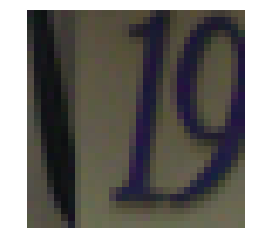

In [23]:
plt.imshow(train_X[:, :, :, 0])
plt.axis('off')
plt.show()

In [52]:
def stack_rgb(img):
    imgs = (img[:, :, 0], img[:, :, 1], img[:, :, 2])
    return np.concatenate(imgs, axis=1)

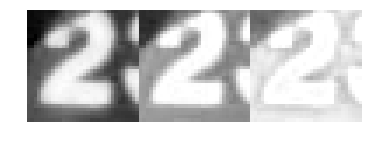

In [53]:
plt.imshow(stack_rgb(train_X[:, :, :, 2]), cmap='gray')
plt.axis('off')
plt.show()

In [41]:
# Standard NTSC/PAL luminance:
train_X_lum = 0.2989*train_X[:,:,0,:] + 0.5870*train_X[:,:,1,:] + 0.1140*train_X[:,:,2,:]
test_X_lum = 0.2989*test_X[:,:,0,:] + 0.5870*test_X[:,:,1,:] + 0.1140*test_X[:,:,2,:]

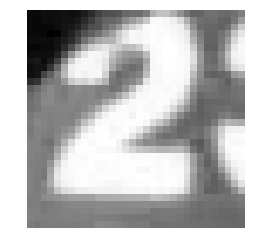

In [65]:
plt.imshow(train_X_lum[:, :, 2], cmap='gray')
plt.axis('off')
plt.show()

My guess:
- Luminance is meant to approximate the brightness we actually see. Images with similar luminance in foreground and background, but different colors, are probably then unlikely: it's just hard to read, and typically also ugly.
- However, color could still be a helpful proxy to help with foreground/background.

In [61]:
def normalize(images):
    """Converts input images to greyscale, and normalizes them
    (i.e. zero mean & unit variance); returns a new array of images
    with shape (Y,X,N).
    
    Parameters:
    images -- Input array, shape (Y,X,3,N), for N color XxY images
    """
    r, g, b = images[:,:,0,:], images[:,:,1,:], images[:,:,2,:]
    img_lum = 0.2989*r + 0.5870*g + 0.1140*b
    img_norm = (img_lum - img_lum.mean()) / img_lum.std()
    return img_norm

In [62]:
train_X_norm = normalize(train_X)